In [1]:
import pickle
import numpy as np
from pprint import pprint
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [39]:
with open("../Data Engineering/PickleFiles/X_train.pickle", 'rb') as data:
    X_train = pickle.load(data)
with open("../Data Engineering/PickleFiles/X_test.pickle", 'rb') as data:
    X_test = pickle.load(data)
with open("../Data Engineering/PickleFiles/y_train.pickle", 'rb') as data:
    y_train = pickle.load(data)
with open("../Data Engineering/PickleFiles/y_test.pickle", 'rb') as data:
    y_test = pickle.load(data)

In [24]:
df1 = pd.read_csv("../Dataset/Train.csv")

In [3]:
lr_0 = LogisticRegression(random_state = 8)

print('Parameters currently in use:\n')
pprint(lr_0.get_params())

Parameters currently in use:

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 8,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


In [4]:
# C
C = [float(x) for x in np.linspace(start = 0.1, stop = 1, num = 12)]

# multi_class
multi_class = ['multinomial']

# solver
solver = ['newton-cg', 'sag', 'saga', 'lbfgs']
 
# class_weight
class_weight = ['balanced', None]

# penalty
penalty = ['l2']

# Create the random grid
random_grid = {'C': C,
               'multi_class': multi_class,
               'solver': solver,
               'class_weight': class_weight,
               'penalty': penalty}

pprint(random_grid)

{'C': [0.1,
       0.18181818181818182,
       0.26363636363636367,
       0.34545454545454546,
       0.42727272727272725,
       0.509090909090909,
       0.5909090909090909,
       0.6727272727272727,
       0.7545454545454545,
       0.8363636363636363,
       0.9181818181818181,
       1.0],
 'class_weight': ['balanced', None],
 'multi_class': ['multinomial'],
 'penalty': ['l2'],
 'solver': ['newton-cg', 'sag', 'saga', 'lbfgs']}


In [5]:
# First create the base model to tune
lrc = LogisticRegression(random_state=8)

# Definition of the random search
random_search = RandomizedSearchCV(estimator=lrc,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)

# Fit the random search model
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=LogisticRegression(random_state=8),
                   n_iter=50,
                   param_distributions={'C': [0.1, 0.18181818181818182,
                                              0.26363636363636367,
                                              0.34545454545454546,
                                              0.42727272727272725,
                                              0.509090909090909,
                                              0.5909090909090909,
                                              0.6727272727272727,
                                              0.7545454545454545,
                                              0.8363636363636363,
                                              0.9181818181818181, 1.0],
                                        'class_weight': ['balanced', None],
                                        'multi_class': ['multinomial'],
                                        'penalty': ['l2'],
                  

In [6]:
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)

The best hyperparameters from Random Search are:
{'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'multinomial', 'class_weight': None, 'C': 0.9181818181818181}

The mean accuracy of a model with these hyperparameters is:
0.6765597992653563


In [8]:
# Create the parameter grid based on the results of random search 
C = [float(x) for x in np.linspace(start = 0.6, stop = 1, num = 10)]
multi_class = ['multinomial']
solver = ['sag']
class_weight = ['balanced']
penalty = ['l2']

param_grid = {'C': C,
               'multi_class': multi_class,
               'solver': solver,
               'class_weight': class_weight,
               'penalty': penalty}

# Create a base model
lrc = LogisticRegression(random_state=8)

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=lrc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             estimator=LogisticRegression(random_state=8),
             param_grid={'C': [0.6, 0.6444444444444444, 0.6888888888888889,
                               0.7333333333333333, 0.7777777777777778,
                               0.8222222222222222, 0.8666666666666667,
                               0.9111111111111111, 0.9555555555555555, 1.0],
                         'class_weight': ['balanced'],
                         'multi_class': ['multinomial'], 'penalty': ['l2'],
                         'solver': ['sag']},
             scoring='accuracy', verbose=1)

In [9]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'C': 0.6888888888888889, 'class_weight': 'balanced', 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'sag'}

The mean accuracy of a model with these hyperparameters is:
0.6799242424242423


In [10]:
best_lrc = grid_search.best_estimator_

In [11]:
best_lrc

LogisticRegression(C=0.6888888888888889, class_weight='balanced',
                   multi_class='multinomial', random_state=8, solver='sag')

In [12]:
best_lrc.fit(X_train, y_train)

LogisticRegression(C=0.6888888888888889, class_weight='balanced',
                   multi_class='multinomial', random_state=8, solver='sag')

In [15]:
lrc_pred = best_lrc.predict(X_test)

In [17]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(y_train, best_lrc.predict(X_train)))

The training accuracy is: 
0.87125


In [18]:
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(y_test, lrc_pred))

The test accuracy is: 
0.7075


In [19]:
# Classification report
print("Classification report")
print(classification_report(y_test,lrc_pred))

Classification report
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       319
           1       0.67      0.77      0.72       280
           2       0.68      0.63      0.66       201

    accuracy                           0.71       800
   macro avg       0.71      0.70      0.70       800
weighted avg       0.71      0.71      0.71       800



In [25]:
df=df1.copy()

In [27]:
li = []
for i in range(len(df['label'])):
    if(df['label'][i]==0):
        li.append("Negative")
    elif(df['label'][i]==1):
        li.append("Neutral")
    else:
        li.append("Positive")
df['label_cat']=li

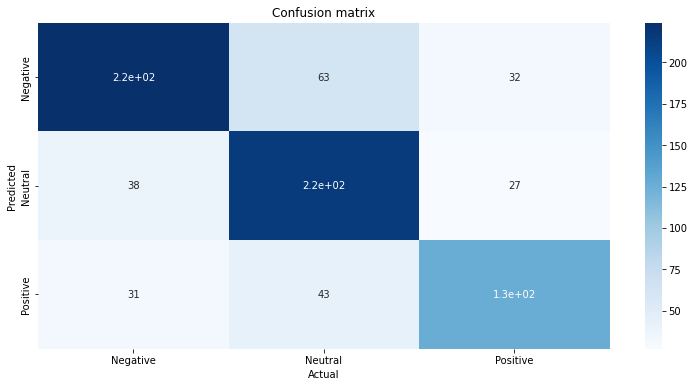

In [29]:
aux_df = df[['label','label_cat']].drop_duplicates().sort_values('label')
conf_matrix = confusion_matrix(y_test, lrc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['label_cat'].values, 
            yticklabels=aux_df['label_cat'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [32]:
base_model = LogisticRegression(random_state = 8)
base_model.fit(X_train, y_train)
accuracy_score(y_test, base_model.predict(X_test))

0.69375

In [35]:
best_lrc.fit(X_train, y_train)
accuracy_score(y_test, best_lrc.predict(X_test))

0.7075

In [36]:
d = {
     'Model': 'Logistic Regression',
     'Training Set Accuracy': accuracy_score(y_train, best_lrc.predict(X_train)),
     'Test Set Accuracy': accuracy_score(y_test, lrc_pred)
}

df_models_lrc = pd.DataFrame(d, index=[0])

In [37]:
df_models_lrc

,Model,Training Set Accuracy,Test Set Accuracy
0,Logistic Regression,0.87125,0.7075


In [38]:
with open('../Models/best_lrc.pickle', 'wb') as output:
    pickle.dump(best_lrc, output)
    
with open('../Models/df_models_lrc.pickle', 'wb') as output:
    pickle.dump(df_models_lrc, output)